#### Abalone is a popular choice of seafood—a shellfish to be precise—that lives in cold coastal waters around the world.

Biologically, abalone is a mollusk belonging to the Gastropoda class. In plain English, this means that abalone is technically a type of marine snail.

However, abalone looks very different from a typical snail and appearance-wise; it has more in common with oysters and mussels than conch.

Due to its flavor and soft texture, abalone is a staple in fine-dining around the world. On the negative side, it grows very slowly at a rate of about 1 inch per year (1).

As a result, there are only small supplies of abalone, and thus the shellfish commands a premium price. For an idea of the price, it tends to cost upward of $100 per kilogram.

For this reason, both chefs and diners view abalone as a luxury food.

### Key Differences between RMSE and RMSLE:
Both metrics are used to evaluate the performance of regression models, but they differ in some aspects:

Scaling magnitude and Sensitivity to outliers: RMSLE is less sensitive to outliers compared to RMSE due to its logarithmic transformation. RMLSE drastically scales down the outliers therefore nullifying their effect.
This can be really advantageous if our dataset has extreme values or skewness.

The error interpretation: RMSLE emphasizes relative errors while, on the other hand, RMSE focuses on absolute errors.
Indeed, with a simple mathematical transformation we can notice that RMLSE can be broadly seen as relative error between the predicted and the actual values.

Biased penalty (perhaps the most important factor): RMSE treats overestimation and underestimation symmetrically, while RMSLE penalizes underestimation more.
In simple words, more penalty is incurred when the predicted value is less than the actual value. On the other hand, less penalty is incurred when the predicted value is more than the actual value.

Hope this information will be helpful. Good luck to you all 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape

(90615, 10)

In [4]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [6]:
train.drop("id",inplace=True,axis=1)
test.drop("id",inplace=True,axis=1)

In [7]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [8]:
test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


#### 1) Create a function to return a dataframe containing columns, count of null values and percentage of null values for each column

In [9]:
def fetch_count_and_percent_of_null(data):  # data is df
    nv = data.isnull().sum()  # nv = null values
    nv = nv[nv>0]
    res = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                       'Percent_Null':(nv.values/data.shape[0])*100})
    res = res.sort_values('Percent_Null',ascending=False)
    return res

### Checking Null values

In [10]:
fetch_count_and_percent_of_null(train)

,Feature,Count_Null,Percent_Null


### Checking Duplicates

In [11]:
train.duplicated().sum()

0

In [12]:
train.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [13]:
num_cols = train.dtypes[train.dtypes!='object'].index
cat_cols = test.dtypes[test.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')
Index(['Sex'], dtype='object')


### Eda

In [14]:
train.nunique()

Sex                  3
Length             157
Diameter           126
Height              90
Whole weight      3175
Whole weight.1    1799
Whole weight.2     979
Shell weight      1129
Rings               28
dtype: int64

### Countplot for categorical features

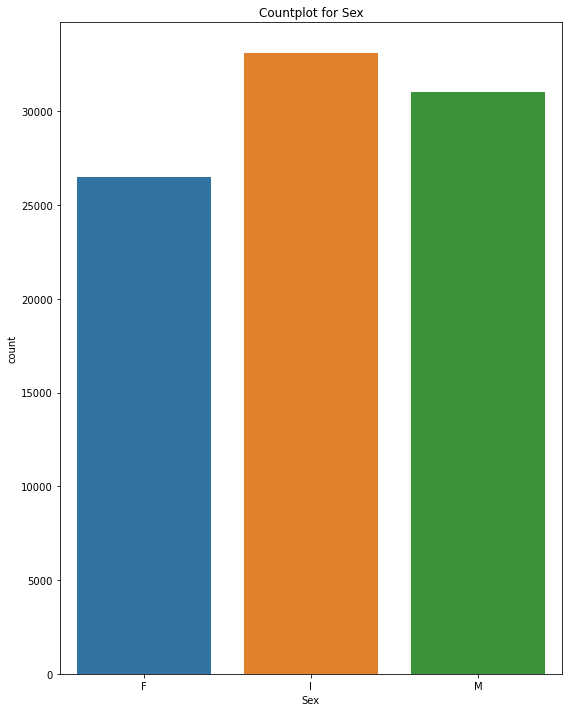

In [15]:
cols = cat_cols

plt.figure(figsize=(8,10))
for i in range(len(cols)): 
    plt.subplot(1,1,i+1)  
    sns.countplot(x=train[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Infants are maximum followed by males and then females

In [16]:
len(num_cols)

8

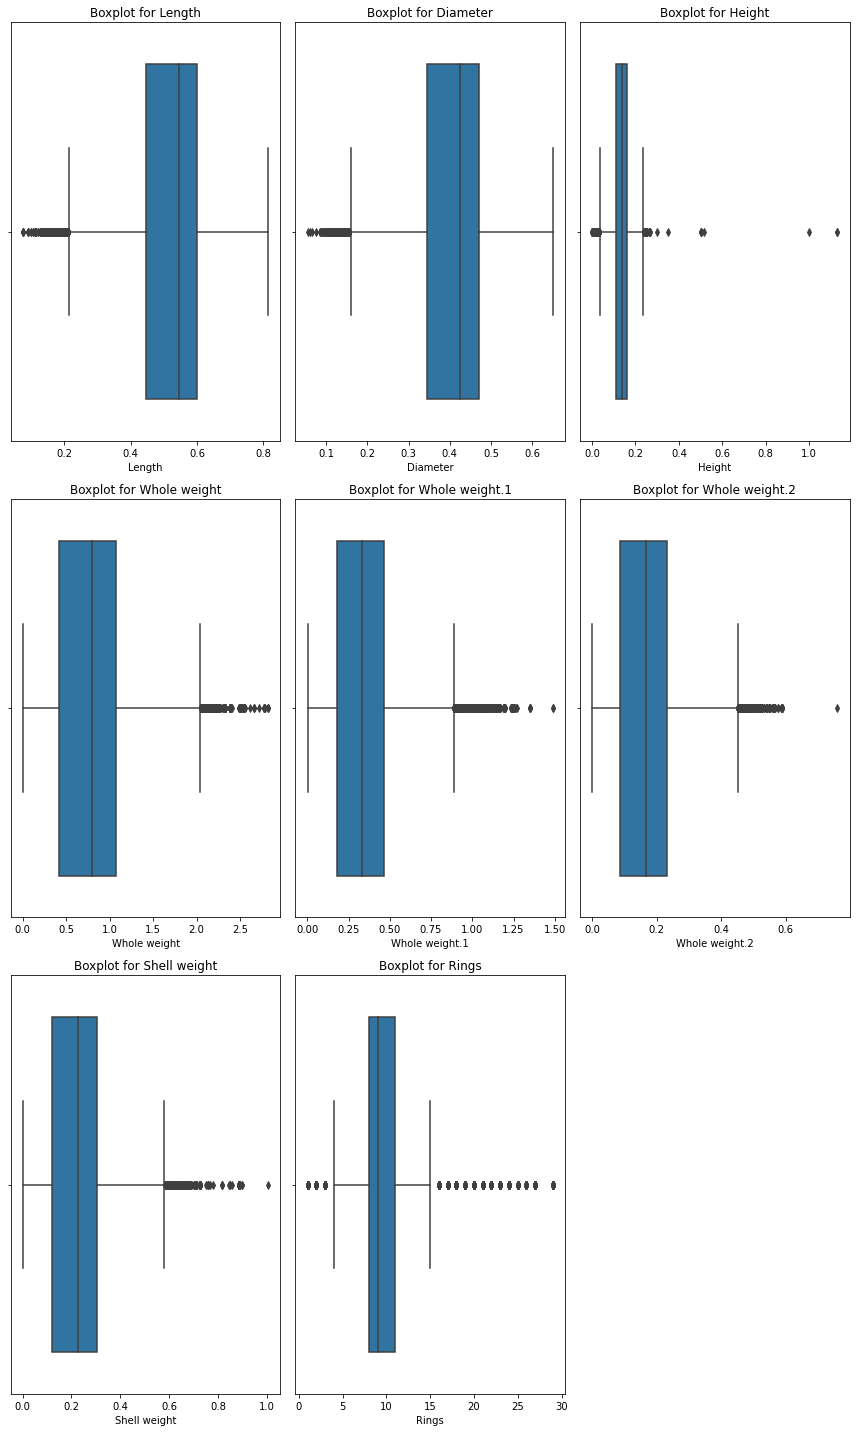

In [17]:
cols = num_cols

plt.figure(figsize=(12,20))
for i in range(len(cols)): 
    plt.subplot(3,3,i+1)
    sns.boxplot(x=train[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

### Histplot for Numerical Features

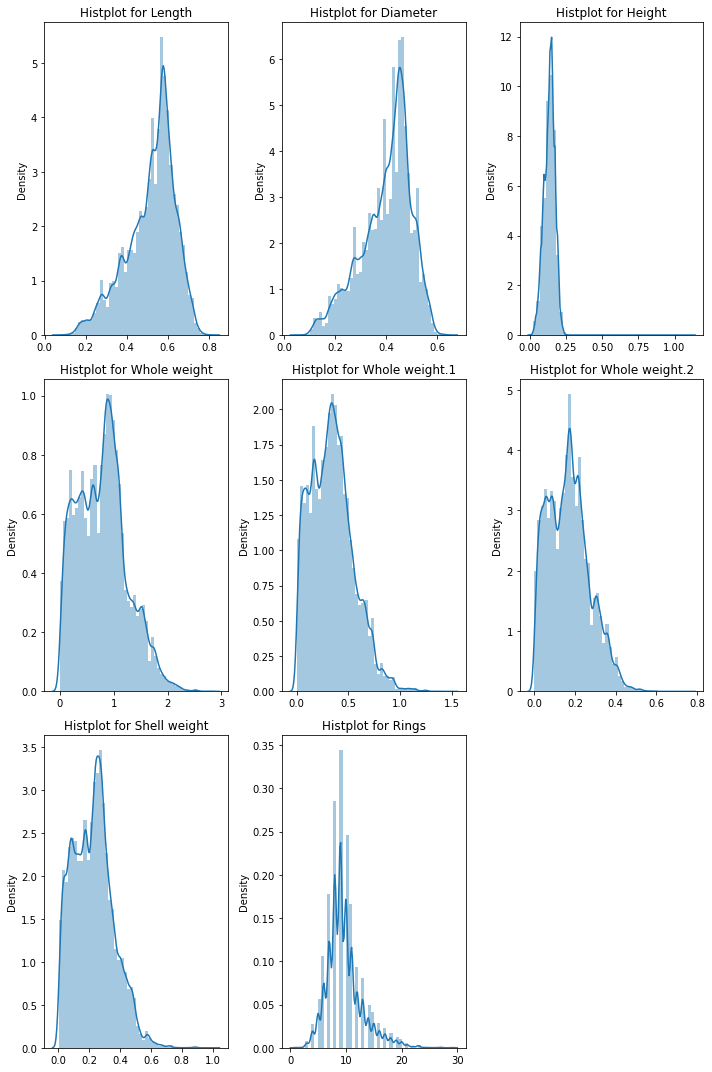

In [18]:
cols =num_cols

plt.figure(figsize=(10,15))
for i in range(len(cols)):  
    plt.subplot(3,3,i+1)    
    sns.distplot(x=train[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')

plt.tight_layout()
plt.show()

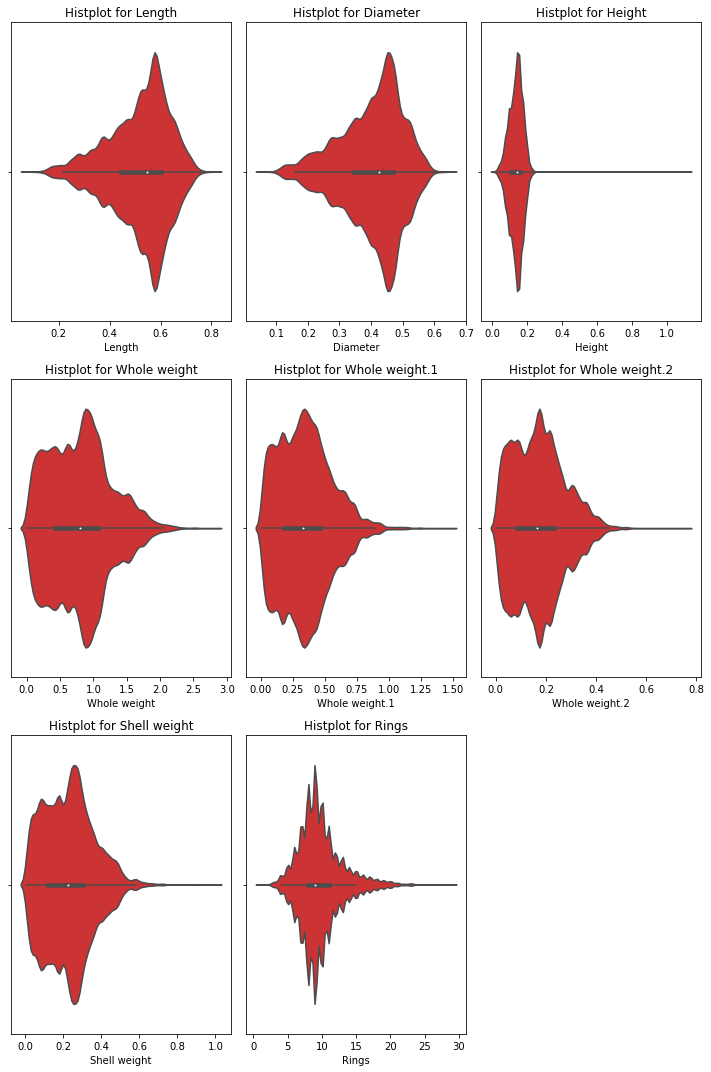

In [19]:
cols =num_cols

plt.figure(figsize=(10,15))
for i in range(len(cols)):  
    plt.subplot(3,3,i+1)    
    sns.violinplot(x=train[cols[i]],kde=True,palette="Set1")
    plt.title(f'Histplot for {cols[i]}')

plt.tight_layout()
plt.show()

### Correlation

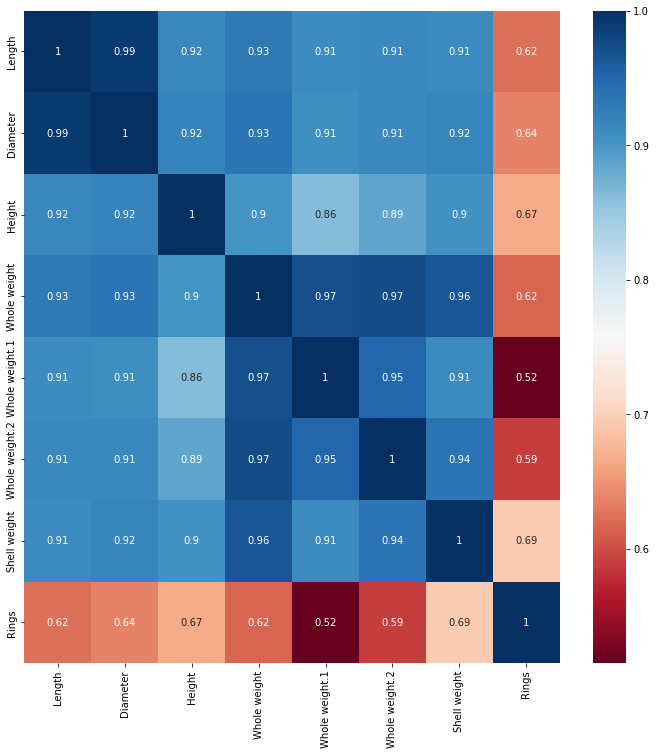

In [20]:
corr = train[num_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')  # annot= True => annotation
plt.show()

In [21]:
k=train.describe(percentiles=[0.01,0.02,0.03,0.04,0.96,0.97,0.98,0.99]).T
k.iloc[:,3:]

,min,1%,2%,3%,4%,50%,96%,97%,98%,99%,max
Length,0.0750,0.1900,0.2350,0.2550,0.2700,0.5450,0.6850,0.6950,0.7050,0.72000,0.8150
Diameter,0.0550,0.1350,0.1700,0.1850,0.2000,0.4250,0.5450,0.5500,0.5600,0.57000,0.6500
Height,0.0000,0.0450,0.0550,0.0600,0.0650,0.1400,0.1950,0.2000,0.2050,0.21500,1.1300
Whole weight,0.0020,0.0320,0.0545,0.0765,0.0960,0.7995,1.6640,1.7395,1.7995,1.93843,2.8255
Whole weight.1,0.0010,0.0125,0.0215,0.0295,0.0370,0.3300,0.7285,0.7510,0.8190,0.89686,1.4880
Whole weight.2,0.0005,0.0065,0.0120,0.0155,0.0195,0.1660,0.3625,0.3750,0.3980,0.42200,0.7600
Shell weight,0.0015,0.0100,0.0155,0.0220,0.0300,0.2250,0.4715,0.4865,0.5100,0.57000,1.0050
Rings,1.0000,4.0000,4.0000,5.0000,5.0000,9.0000,17.0000,17.0000,19.0000,20.00000,29.0000


### Outliers treatment

In [22]:
cols_left_skewed = ["Length","Diameter"]

def lower_outlier_treatment(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [23]:
cols_right_skewed = ["Height","Whole weight","Whole weight.1","Whole weight.2","Shell weight"]

def lower_outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

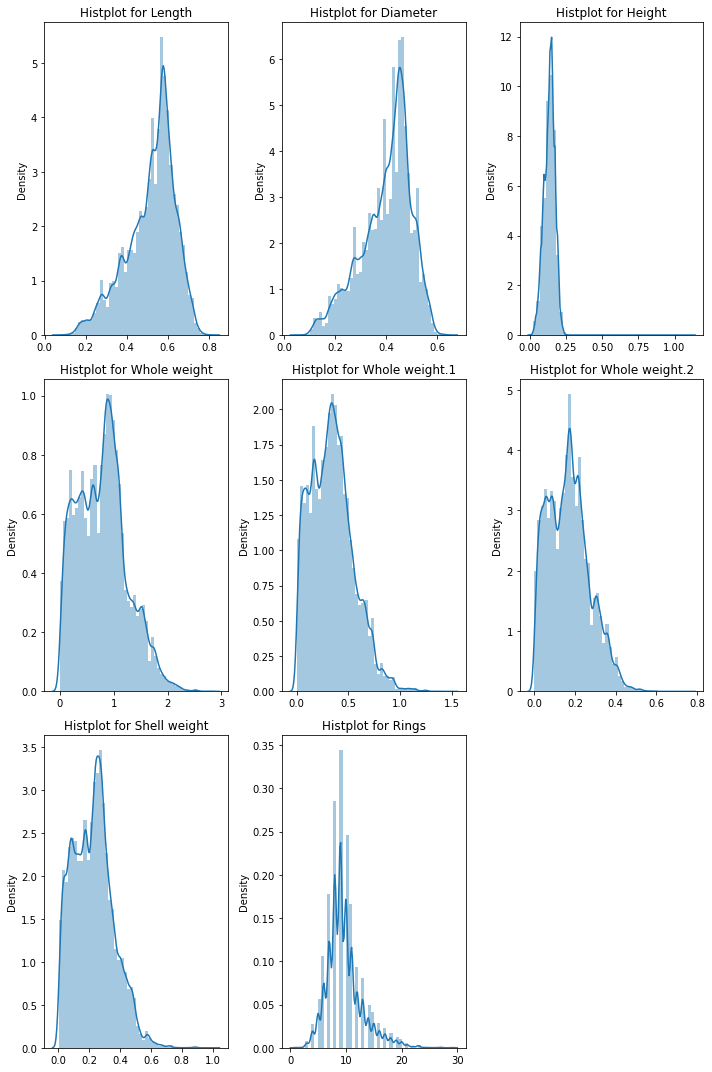

In [24]:
cols =num_cols

plt.figure(figsize=(10,15))
for i in range(len(cols)):  
    plt.subplot(3,3,i+1)    
    sns.distplot(x=train[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')

plt.tight_layout()
plt.show()

### After Clipping only extreme outliers

In [25]:
train1=train.copy()

In [26]:
train2=train.copy()

### After clipping all outliers

In [27]:
train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [28]:
cols_with_outliers = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight']

In [29]:
for i in train[cols_with_outliers]:
    q1 = train[i].quantile(0.25)
    q3 = train[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    train[i] = np.where(train[i]>upper,upper,train[i])
    train[i] = np.where(train[i]<lower,lower,train[i])

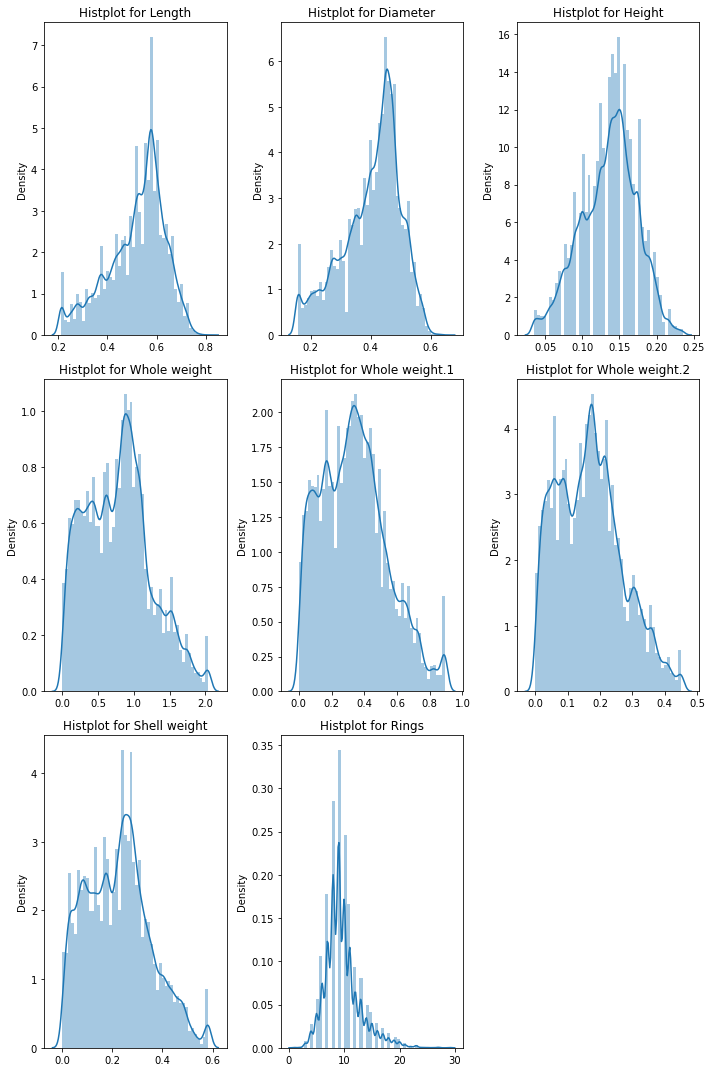

In [30]:
cols =num_cols

plt.figure(figsize=(10,15))
for i in range(len(cols)):  
    plt.subplot(3,3,i+1)    
    sns.distplot(x=train[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [31]:
cat_cols = train.dtypes[train.dtypes=='object'].index
print(cat_cols)

Index(['Sex'], dtype='object')


### Encoding

In [32]:
cols_to_be_encoded = ["Sex"]

df_dum = pd.get_dummies(data=train,columns = cols_to_be_encoded, drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(90615, 10)
Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')


In [33]:
cols_to_be_encoded = ["Sex"]

df_dum_extreme = pd.get_dummies(data=train1,columns = cols_to_be_encoded, drop_first=True)
print(df_dum_extreme.shape)
print(df_dum_extreme.columns)

(90615, 10)
Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')


### Select X and Y

In [34]:
x=df_dum.drop(["Rings"],axis=1)
y=df_dum["Rings"]

In [35]:
x_extreme=df_dum_extreme.drop(["Rings"],axis=1)
y_extreme=df_dum_extreme["Rings"]

In [36]:
train.shape

(90615, 9)

## Checking target variable is normally Distributed or not

In [37]:
from scipy.stats import shapiro, jarque_bera
from scipy.stats import boxcox
# Ho : Data is normally dist => p>0.05
# H1 : Data is not normally dist => p<=0.05

In [38]:
test_stat,p = jarque_bera(df_dum['Rings'])
print(test_stat)
print(p)

47675.67502270053
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

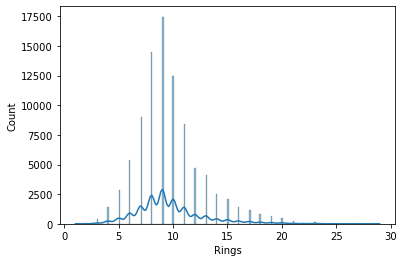

In [39]:
sns.histplot(df_dum['Rings'],kde=True)
plt.show

In [40]:
test_stat,p = jarque_bera(np.log((df_dum['Rings'])))
print(test_stat)
print(p)

9561.03802192937
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

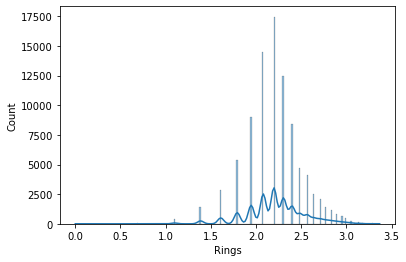

In [41]:
sns.histplot(np.log(df_dum['Rings']),kde=True)
plt.show

In [42]:
y1,i=boxcox(y)

In [43]:
test_stat,p = jarque_bera(y)

<function matplotlib.pyplot.show(close=None, block=None)>

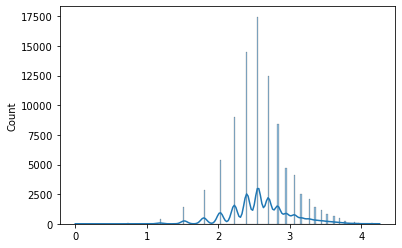

In [44]:
sns.histplot(y1,kde=True)
plt.show

### Finding Vif and then implementing ols in next step

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
for i in range(x.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8


In [49]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif=vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
1,Diameter,1002.965616
0,Length,970.704162
3,Whole weight,291.509450
2,Height,128.381845
4,Whole weight.1,87.683087
6,Shell weight,82.718951
5,Whole weight.2,80.056669
7,Sex_I,3.001403
8,Sex_M,2.130658


In [57]:
x1=x.copy()
x2=x_extreme.copy()
y5=y1.copy()

In [50]:
import statsmodels.api as sm

In [58]:
x1=sm.add_constant(x1)
ols_m1=sm.OLS(y5,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 2.042e+04
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:40:03   Log-Likelihood:                -1696.8
No. Observations:               90615   AIC:                             3414.
Df Residuals:                   90605   BIC:                             3508.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3713      0.008    172.870      0.000       1.356       1.387
Length             0.4613      0.051      9.133      0.000       0.362       0.560
Diameter           1.4487      0.063     23.088      0.000       1.326       1.572
Height             3.7820      0.067     56.233      0.000       3.650       3.914
Whole weight       0.2770      0.015     17.934      0.000       0.247       0.307
Whole weight.1    -1.9528      0.020    -99.625      0.000      -1.991      -1.914
Whole weight.2    -0.8211      0.037    -22.030      0.000      -0.894      -0.748
Shell weight       2.2694      0.029     78.074      0.000       2.212       2.326
Sex_I             -0.0982      0.003    -37.280      0.000      -0.103      -0.093
Sex_M             -0.0008      0.002     -0.370      0.711      -0.005       0.003
==============================================================================
Omnibus:                    11658.969   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107012.212
Skew:                           0.300   Prob(JB):                         0.00
Kurtosis:                       8.290   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P value is 0.711 "Sex_M" it has maximum value

In [62]:
x2=sm.add_constant(x2)
ols_m2=sm.OLS(y5,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.998e+04
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:40:39   Log-Likelihood:                -2359.3
No. Observations:               90615   AIC:                             4739.
Df Residuals:                   90605   BIC:                             4833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4138      0.008    186.864      0.000       1.399       1.429
Length             0.4293      0.050      8.596      0.000       0.331       0.527
Diameter           1.5701      0.062     25.316      0.000       1.449       1.692
Height             3.0170      0.061     49.719      0.000       2.898       3.136
Whole weight       0.2982      0.015     19.880      0.000       0.269       0.328
Whole weight.1    -1.8492      0.019    -98.896      0.000      -1.886      -1.813
Whole weight.2    -0.7995      0.037    -21.828      0.000      -0.871      -0.728
Shell weight       2.1618      0.027     79.663      0.000       2.109       2.215
Sex_I             -0.1003      0.003    -37.877      0.000      -0.105      -0.095
Sex_M             -0.0009      0.002     -0.435      0.664      -0.005       0.003
==============================================================================
Omnibus:                    12301.430   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135610.931
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       8.971   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print("OLS Model = 1")
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS Model = 1
0.6697721193506697
0.6697393170668461


In [64]:
print("OLS Model = 2")
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

OLS Model = 2
0.6649082843155203
0.664874998895939


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y5,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67961, 9)
(22654, 9)
(67961,)
(22654,)


In [65]:
from sklearn.metrics import *

In [ ]:
def eval_regression(model,x_train,x_test,y_train,y_test,modelname):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,y_pred)
    test_mse = mean_squared_error(y_test,y_pred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res,y_pred